In [1]:
%pylab inline
from pandas import Series, DataFrame
from pandas_datareader.data import DataReader
from wallet.core import create_app
from wallet.model.m1 import M1Portfolio
from wallet.util.analysis import _moving_average_statistics
app = create_app()

Populating the interactive namespace from numpy and matplotlib


[2019-11-30 12:37:52,284] INFO in core: Started 


,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
S&P 500,99.0,0.056929,0.320207,-1.186224,-0.124504,0.127955,0.254456,0.706355,0.153001,5.676534,6.022979,-1.030933
M1,99.0,0.044767,0.261067,-0.684769,-0.101996,0.073629,0.229013,0.592218,0.141075,4.104293,3.987444,-0.642173
Alibaba,99.0,0.138033,0.925023,-2.744218,-0.422734,0.293132,0.645310,2.293916,0.140642,14.501633,14.025963,-0.489515
CSI 300,99.0,-0.005569,0.538689,-1.971585,-0.293104,0.007149,0.304087,1.023497,-0.025071,-3.329831,10.234841,-0.569450


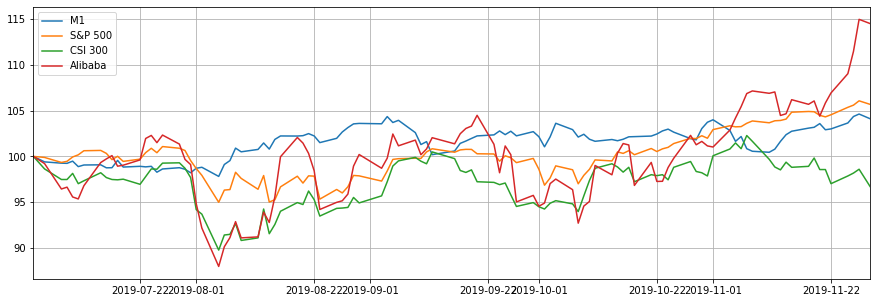

In [2]:
with app.app_context():
    m1 = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Individual', 126)})
data = DataReader(['SPY', 'ASHR', 'BABA'], 'yahoo', m1.index[0])['Adj Close']
frame = DataFrame({
    'M1': m1,
    'S&P 500': data['SPY'],
    'CSI 300': data['ASHR'],
    'Alibaba': data['BABA'],
}).dropna()
for key in frame.columns:
    frame[key] *= 100 / frame[key][0]
frame.plot(figsize=(15, 5), grid=1)
_moving_average_statistics(frame, 5)

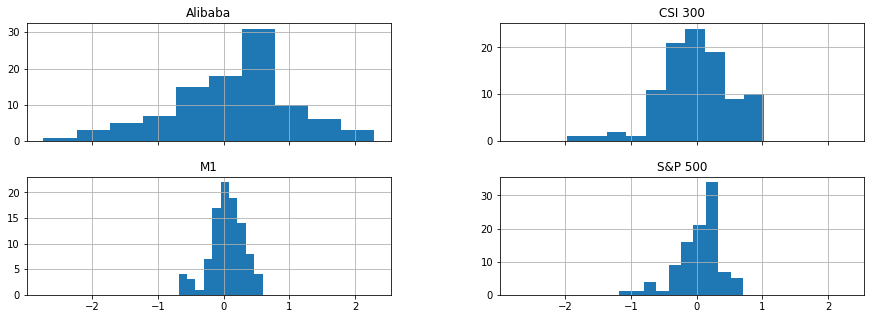

In [3]:
ret = frame.rolling(5).mean().pct_change() * 100
_ = ret.hist(sharex=1, figsize=(15, 5), layout=(2, 2))